<a href="https://colab.research.google.com/github/sanu1230/Academic-Assignments/blob/master/K_means_Seeds_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Means Clustering

### Table of Content

1. [Data Description](#dd)
2. [Importing the dataset and packages](#import)
3. [Exploratory Data Analysis](#eda)
4. [Finding Clusters with Elbow Method](#elbow)
5. [Building K Means model](#Kmeans)

### Data Description  <a id='dd'>
    
The dataset consists of 3 different varieties of wheat kernels: Kama, Rosa and Canadian. <br>
Different physical attributes of the wheat kernels were measured and recorded.
Here we have 70 records for each variety.

Using these records we will perform cluster analysis to determine the variety.

Attribute Information:<br>

To construct the data, seven geometric parameters of wheat kernels were measured: <br>
1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.
All of these parameters were real-valued continuous.

### Importing the dataset and packages  <a id = 'import'>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
seeds_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/UpX/Adv.ML Projects/K-means/Class_material/attachment_seeds_dataset.csv')

In [4]:
seeds_df.head()

,area,perimeter,compactness,length,width,asymmetry coef,kernel_groove_length,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [5]:
seeds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   area                  210 non-null    float64
 1   perimeter             210 non-null    float64
 2   compactness           210 non-null    float64
 3   length                210 non-null    float64
 4   width                 210 non-null    float64
 5   asymmetry coef        210 non-null    float64
 6   kernel_groove_length  210 non-null    float64
 7   species               210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


**Observation**: There are no missing values.

In [6]:
seeds_df.describe()

,area,perimeter,compactness,length,width,asymmetry coef,kernel_groove_length,species
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


**Observation**: There is not much variance. There will be no need of scaling.

### Exploratory Data Analysis  <a id = 'eda'>

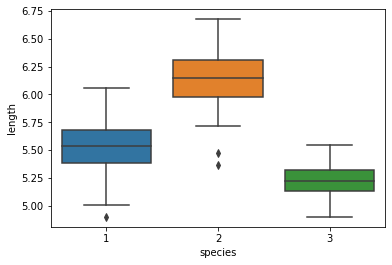

In [7]:
sns.boxplot(x= 'species', y='length', data = seeds_df)

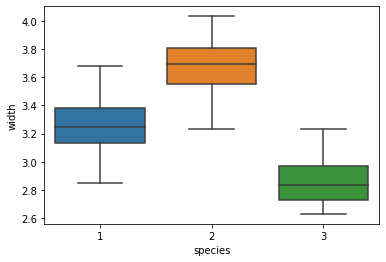

In [8]:
sns.boxplot(x= 'species', y='width', data = seeds_df)

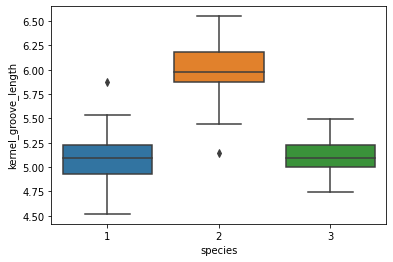

In [9]:
sns.boxplot(x= 'species', y='kernel_groove_length', data = seeds_df)

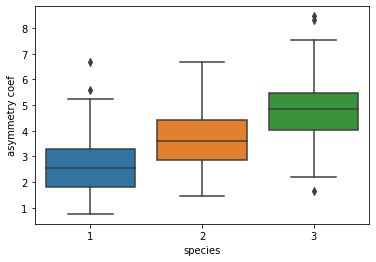

In [10]:
sns.boxplot(x= 'species', y='asymmetry coef', data = seeds_df)

### Correlation Plot

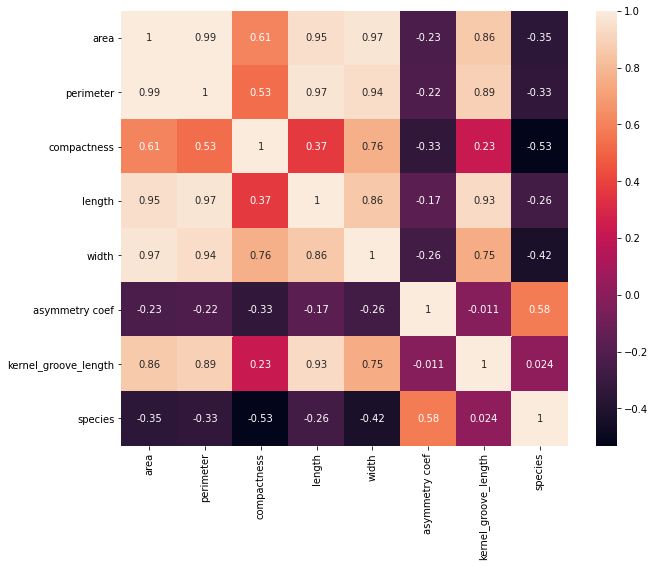

In [11]:
figsize=[10,8]
plt.figure(figsize=figsize)
sns.heatmap(seeds_df.corr(),annot=True)
plt.show()

**Strong Correlation between**: area, perimeter, length, width, kernel_groove_length

### Histogram

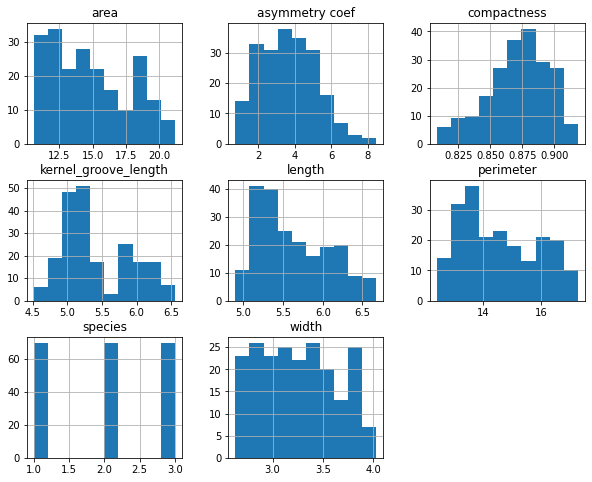

In [12]:
seeds_df.hist(figsize=figsize)
plt.show()

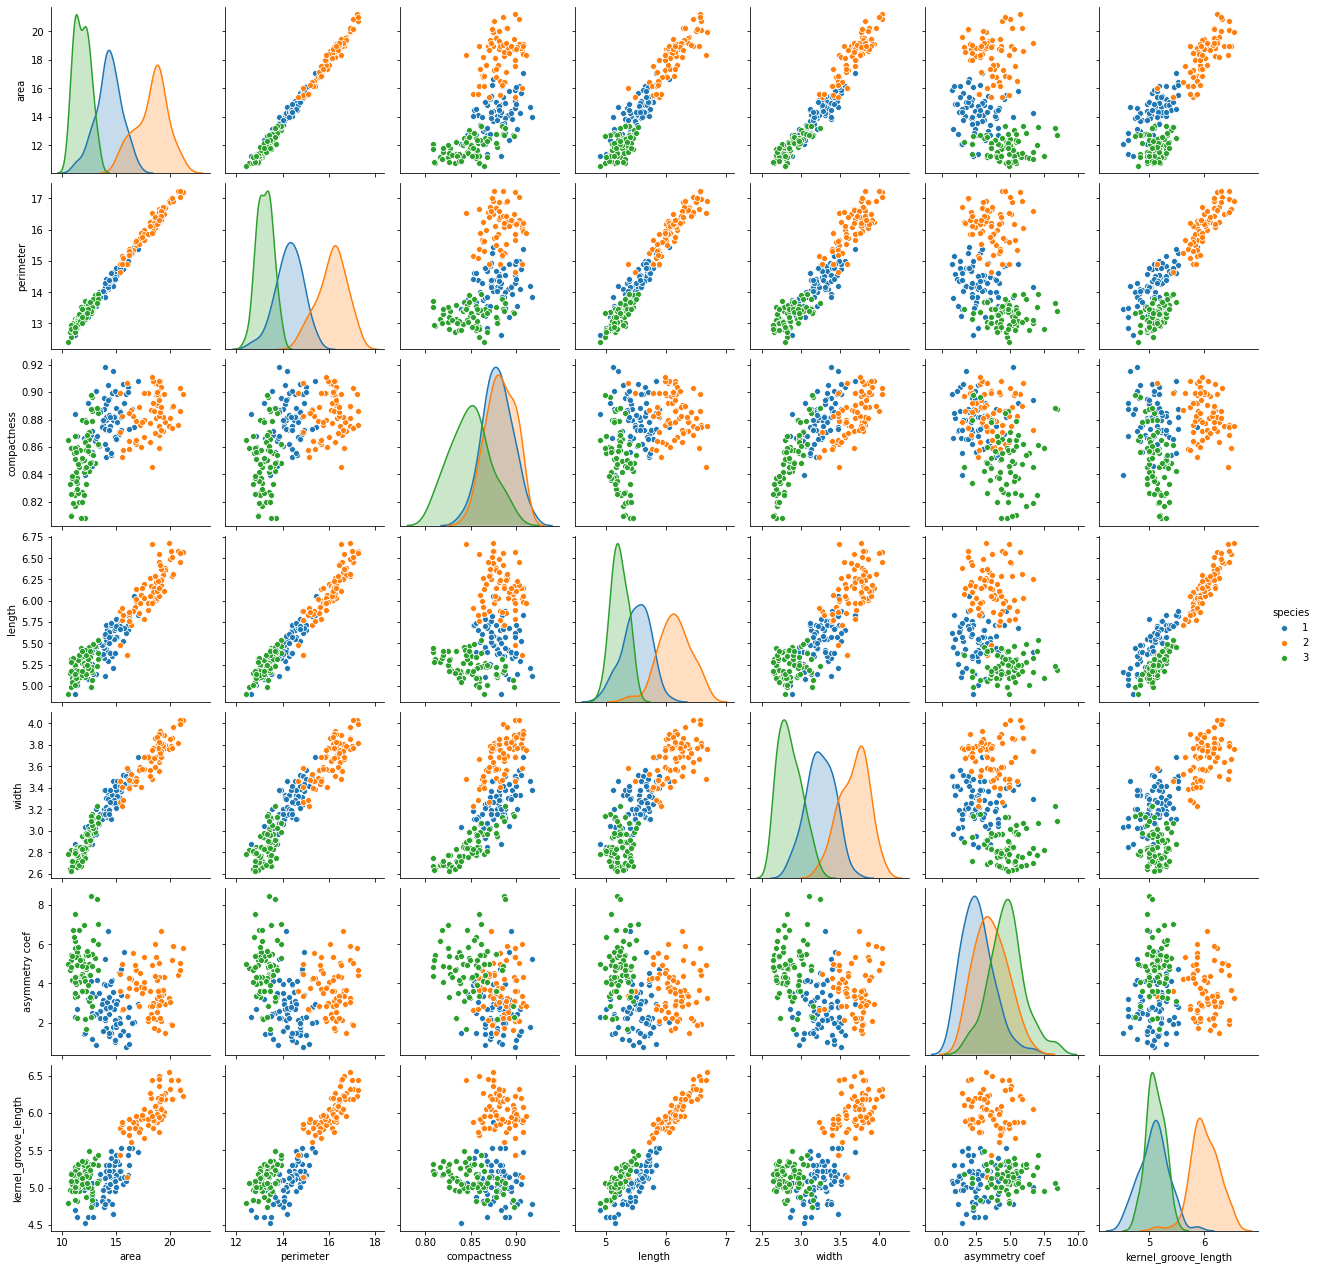

In [13]:
sns.pairplot(seeds_df, hue='species')

We will drop compactness and species. <br>
Compactness is a column derived from perimeter and area which will not be required.  <br>
We are going to determine species.

In [14]:
data = seeds_df.drop(['compactness', 'species'], axis =1)

In [15]:
data.head()

,area,perimeter,length,width,asymmetry coef,kernel_groove_length
0,15.26,14.84,5.763,3.312,2.221,5.220
1,14.88,14.57,5.554,3.333,1.018,4.956
2,14.29,14.09,5.291,3.337,2.699,4.825
3,13.84,13.94,5.324,3.379,2.259,4.805
4,16.14,14.99,5.658,3.562,1.355,5.175


### Finding clusters with Elbow Method   <a id='elbow'>

In [16]:
from sklearn.cluster import KMeans

ssw=[]
cluster_range=range(1,10)
for i in cluster_range:
    model=KMeans(n_clusters=i,init="k-means++",n_init=10, max_iter=300, random_state=0)
    model.fit(data)
    ssw.append(model.inertia_)

In [17]:
ssw_df=pd.DataFrame({"no. of clusters":cluster_range,"SSW":ssw})
print(ssw_df)

   no. of clusters          SSW
0                1  2719.735715
1                2  1011.620084
2                3   587.246038
3                4   470.931572
4                5   385.435041
5                6   323.198030
6                7   279.752140
7                8   240.642659
8                9   218.047034


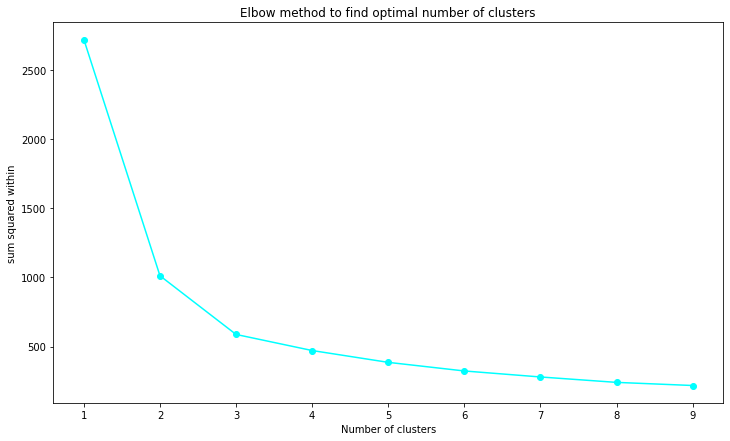

In [18]:
plt.figure(figsize=(12,7))
plt.plot(cluster_range, ssw, marker = "o",color="cyan")
plt.xlabel("Number of clusters")
plt.ylabel("sum squared within")
plt.title("Elbow method to find optimal number of clusters")
plt.show()

**Please notice that we spotted the elbow when number of clusters is 3 and after 3rd cluster there is no significant change in ssw.**

### Building the KMeans Model  <a id='Kmeans'>

In [19]:
# We'll continue our analysis with n_clusters=3
kmeans=KMeans(n_clusters=3, init="k-means++", n_init=10, random_state = 42)
# Fit the model
k_model=kmeans.fit(data)

In [20]:
## It returns the cluster vectors i.e. showing observations belonging which clusters 
clusters=k_model.labels_
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

**This is similar to the 3 species that we originally had.**  <br>
Cluster 1 -- Species 1  <br>
Cluster 0 -- Species 2  <br>
Cluster 2 --  Species 3

In [21]:
seeds_df['clusters'] = clusters

In [22]:
seeds_df.head()

,area,perimeter,compactness,length,width,asymmetry coef,kernel_groove_length,species,clusters
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,0


In [23]:
seeds_df['clusters'].value_counts()

2    77
0    72
1    61
Name: clusters, dtype: int64

In [24]:
# Centroid of each clusters
centroid_df = pd.DataFrame(k_model.cluster_centers_, columns=data.columns)
centroid_df

,area,perimeter,length,width,asymmetry coef,kernel_groove_length
0,14.648472,14.460417,5.563778,3.277903,2.648933,5.192319
1,18.721803,16.297377,6.208934,3.722672,3.603590,6.066098
2,11.964416,13.274805,5.229286,2.872922,4.759740,5.088519


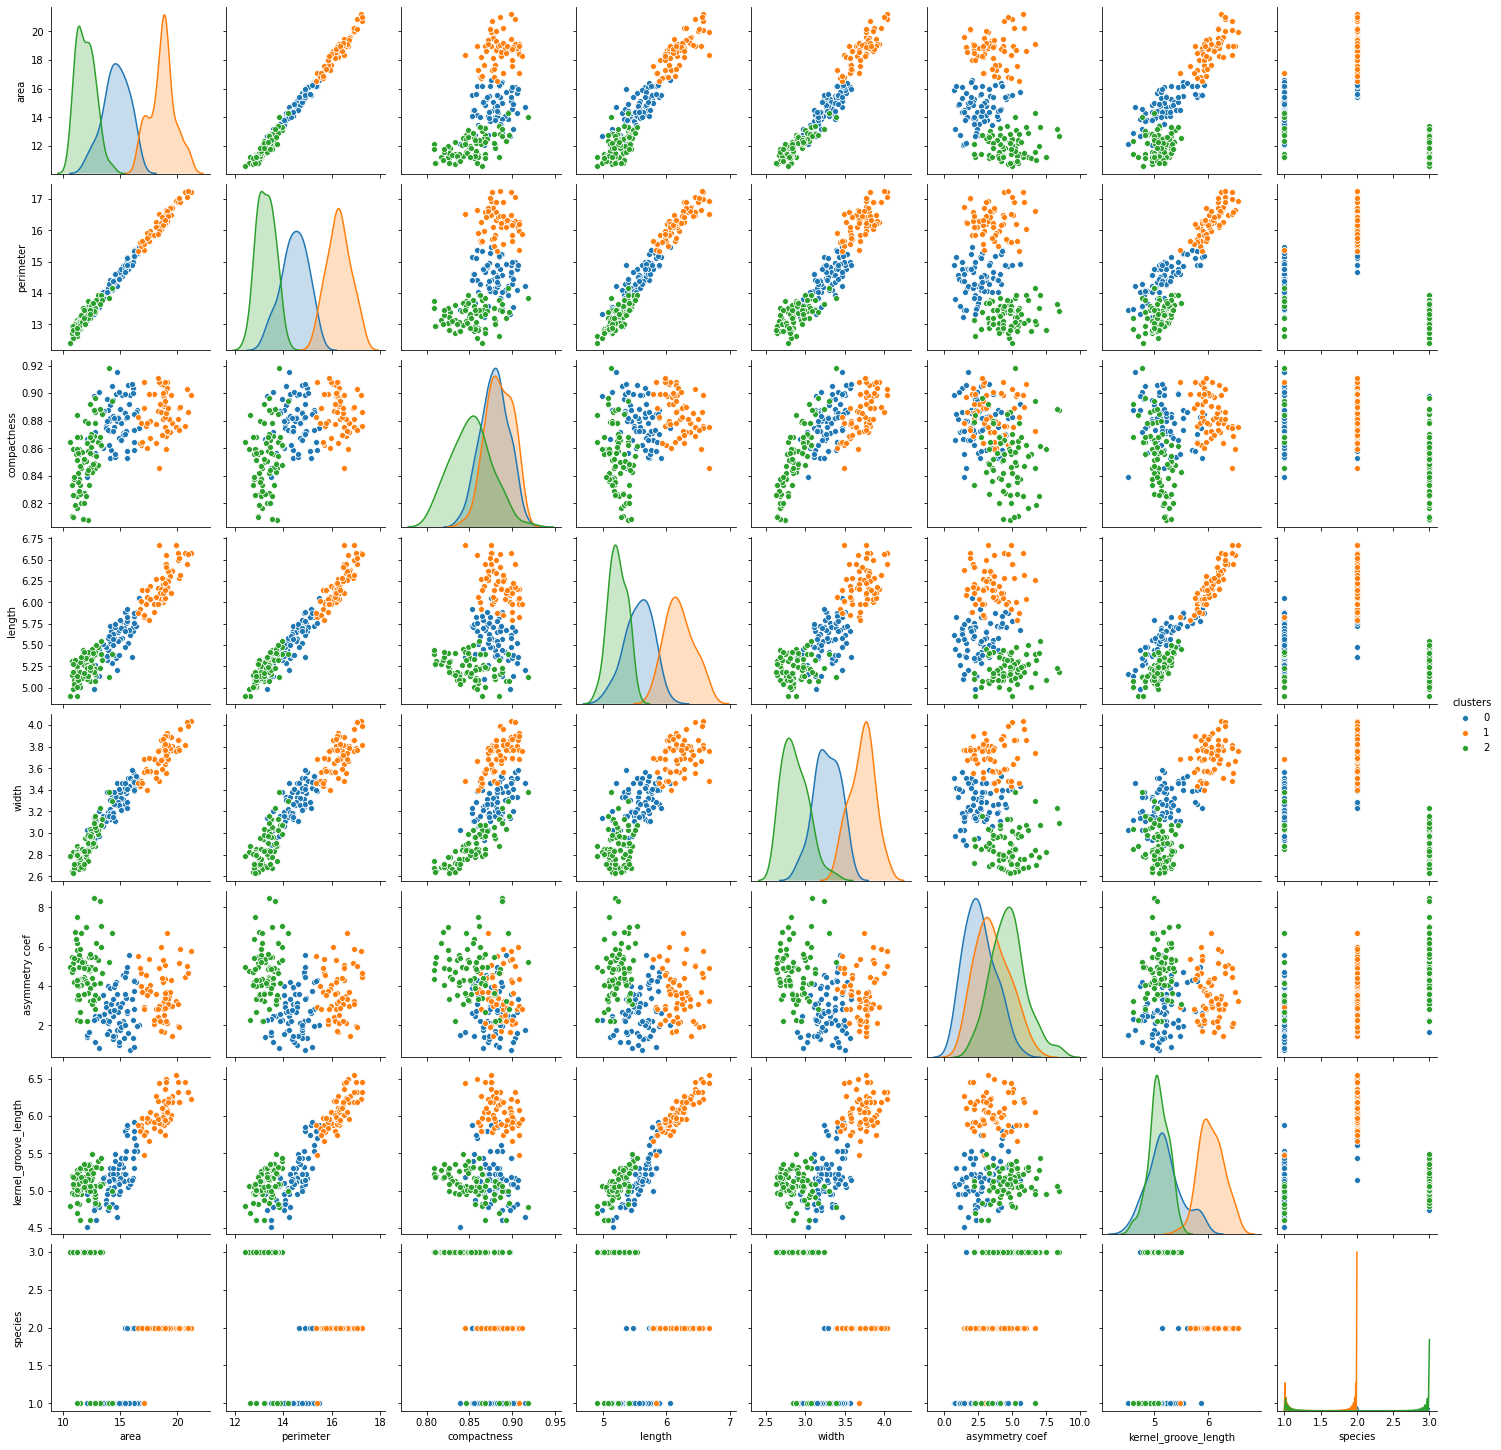

In [25]:
### Visualizing the cluster based on each pair of columns

sns.pairplot(seeds_df, hue='clusters');

### The End